csc536 Data Viz.

SIT@KMUTT

March 2022

by PM

- Reference:Python Data Analytics by Fabio Nelli, APress, 2015
    
- Some more basics of Python's Numpy and Pandas

In [1]:

# The three phases of data manipulation are
#      Data preparation
#      Data transformation
#      Data aggregation

import numpy as np
import pandas as pd

df =  pd.DataFrame(np.arange(9).reshape(3,3),
    index=['white','black','red'],
    columns=['ball','pen','pencil'])
df

,ball,pen,pencil
white,0,1,2
black,3,4,5
red,6,7,8


In [2]:
# data preparation: merging

fr1 = pd.DataFrame( {'id':['ball','pencil','pen','mug','ashtray'],
    'price': [12.33,11.44,33.21,13.23,33.62]})
fr2 = pd.DataFrame( {'id':['pencil','pencil','ball','pen'],
    'color': ['white','red','red','black']})
pd.merge(fr1,fr2)

,id,price,color
0,ball,12.33,red
1,pencil,11.44,white
2,pencil,11.44,red
3,pen,33.21,black


In [3]:
# in most cases you need to decide which is the column on which to base the merging

fm1 = pd.DataFrame( {'id':['ball','pencil','pen','mug','ashtray'],
    'color': ['white','red','red','black','green'],
    'brand': ['OMG','ABC','ABC','POD','POD']})
print(fm1)

fm2 = pd.DataFrame( {'id':['pencil','pencil','ball','pen'],
    'brand': ['OMG','POD','ABC','POD']})
print(fm2)

# specifying which column to be jointly used when merging
pd.merge(fm1,fm2, on='id')  # by default, this is an inner join, or intersection


        id  color brand
0     ball  white   OMG
1   pencil    red   ABC
2      pen    red   ABC
3      mug  black   POD
4  ashtray  green   POD
       id brand
0  pencil   OMG
1  pencil   POD
2    ball   ABC
3     pen   POD


,id,color,brand_x,brand_y
0,ball,white,OMG,ABC
1,pencil,red,ABC,OMG
2,pencil,red,ABC,POD
3,pen,red,ABC,POD


In [4]:
# try this outer join, or union
pd.merge(fm1,fm2, on='id', how='outer')

,id,color,brand_x,brand_y
0,ball,white,OMG,ABC
1,pencil,red,ABC,OMG
2,pencil,red,ABC,POD
3,pen,red,ABC,POD
4,mug,black,POD,NaN
5,ashtray,green,POD,NaN


In [5]:
# concatenate
fm1 = pd.DataFrame( {'id':['pencil','pencil','ball','pen'],
    'brand': ['OMG','POD','ABC','POD']})
print(fm1)
fm2 = pd.DataFrame(np.random.rand(9).reshape(3,3), index=[4,5,6], 
    columns=['A','B','C'])
print(fm2)

pd.concat([fm1,fm2], sort=False)

       id brand
0  pencil   OMG
1  pencil   POD
2    ball   ABC
3     pen   POD
          A         B         C
4  0.035205  0.691099  0.882682
5  0.369826  0.514550  0.202574
6  0.203450  0.157500  0.592327


,id,brand,A,B,C
0,pencil,OMG,NaN,NaN,NaN
1,pencil,POD,NaN,NaN,NaN
2,ball,ABC,NaN,NaN,NaN
3,pen,POD,NaN,NaN,NaN
4,NaN,NaN,0.035205,0.691099,0.882682
5,NaN,NaN,0.369826,0.514550,0.202574
6,NaN,NaN,0.203450,0.157500,0.592327


In [6]:
pd.concat([fm1,fm2], sort=False, axis=1)

,id,brand,A,B,C
0,pencil,OMG,NaN,NaN,NaN
1,pencil,POD,NaN,NaN,NaN
2,ball,ABC,NaN,NaN,NaN
3,pen,POD,NaN,NaN,NaN
4,NaN,NaN,0.035205,0.691099,0.882682
5,NaN,NaN,0.369826,0.514550,0.202574
6,NaN,NaN,0.203450,0.157500,0.592327


In [7]:
# stack() will get the pivoting of the columns in rows, thus producing a Series
st = df.stack()
print(st)
type(st)

white  ball      0
       pen       1
       pencil    2
black  ball      3
       pen       4
       pencil    5
red    ball      6
       pen       7
       pencil    8
dtype: int64


pandas.core.series.Series

In [8]:
# long format data

lf = pd.DataFrame({ 'color':['white','white','white',
    'red','red','red',
    'black','black','black'],
    'item':['ball','pen','mug',
    'ball','pen','mug',
    'ball','pen','mug'],
    'value': np.random.rand(9)})
lf

,color,item,value
0,white,ball,0.564409
1,white,pen,0.067296
2,white,mug,0.650485
3,red,ball,0.186979
4,red,pen,0.124364
5,red,mug,0.916812
6,black,ball,0.859603
7,black,pen,0.042155
8,black,mug,0.839940


In [9]:
# changed to a wide format, using pivot()
# by providing parameters as column(s)

wf = lf.pivot("color", 'item')
wf

value                    
item       ball       mug       pen
color                              
black  0.859603  0.839940  0.042155
red    0.186979  0.916812  0.124364
white  0.564409  0.650485  0.067296

In [10]:
# Let's try to remove a column, using del
# Removing a row, using drop()

frm = pd.DataFrame(np.arange(9).reshape(3,3),
    index=['white','black','red'],
    columns=['ball','pen','pencil'])
print(frm)
# delete a column
del frm['pen']
print("\nAfter")
print(frm)
# delete a row
print("\nDeleting a row")
fm =frm.drop('black')
fm

       ball  pen  pencil
white     0    1       2
black     3    4       5
red       6    7       8

After
       ball  pencil
white     0       2
black     3       5
red       6       8

Deleting a row


,ball,pencil
white,0,2
red,6,8


In [11]:
# Data transformation
# removing duplicated rows
dfr = pd.DataFrame({ 'color': ['white','white','red','red','white'],
    'value': [2,1,3,3,2]})
print(dfr)
print('\nShow the duplicated rows\n')
print(dfr.duplicated())

# to ascertain the duplicated rows
dfr[dfr.duplicated()]

# to delete all duplicated rows
dfr.drop_duplicates()

   color  value
0  white      2
1  white      1
2    red      3
3    red      3
4  white      2

Show the duplicated rows

0    False
1    False
2    False
3     True
4     True
dtype: bool


,color,value
0,white,2
1,white,1
2,red,3


In [12]:
# replace some values
fra = pd.DataFrame({ 'item':['ball','mug','pen','pencil','ashtray'],
    'color':['white','rosso','verde','black','yellow'],
    'price':[5.56,4.20,1.30,0.56,2.75]})
print(fra)
new_colors = {
    'rosso':'red',
    'verde':'green'
}
fra.replace(new_colors)

      item   color  price
0     ball   white   5.56
1      mug   rosso   4.20
2      pen   verde   1.30
3   pencil   black   0.56
4  ashtray  yellow   2.75


,item,color,price
0,ball,white,5.56
1,mug,red,4.20
2,pen,green,1.30
3,pencil,black,0.56
4,ashtray,yellow,2.75


In [13]:
# replace a NaN with, say, 0
sr = pd.Series([1,3,np.nan,4,6,np.nan,3])
print(sr)
print('\nReplace NaN with zero')
sr.replace(np.nan,0)

0    1.0
1    3.0
2    NaN
3    4.0
4    6.0
5    NaN
6    3.0
dtype: float64

Replace NaN with zero


0    1.0
1    3.0
2    0.0
3    4.0
4    6.0
5    0.0
6    3.0
dtype: float64

In [14]:
# adding some values via mapping
frm = pd.DataFrame({ 'item':['ball','mug','pen','pencil','ashtray'],
                    'color':['white','red','green','black','yellow']})
print(frm)

# you also have a price list as follows
price = {
    'ball' : 5.56,
    'mug' : 4.20,
    'bottle' : 1.30,
    'scissors' : 3.41,
    'pen' : 1.30,
    'pencil' : 0.56,
    'ashtray' : 2.75
}

print(price)

frm['price'] = frm['item'].map(price)
frm

      item   color
0     ball   white
1      mug     red
2      pen   green
3   pencil   black
4  ashtray  yellow
{'ball': 5.56, 'mug': 4.2, 'bottle': 1.3, 'scissors': 3.41, 'pen': 1.3, 'pencil': 0.56, 'ashtray': 2.75}


,item,color,price
0,ball,white,5.56
1,mug,red,4.20
2,pen,green,1.30
3,pencil,black,0.56
4,ashtray,yellow,2.75


In [15]:
# rename the index
reindex = {
    0: 'first',
    1: 'second',
    2: 'third',
    3: 'fourth',
    4: 'fifth'
}

frm1 = frm.rename(reindex)
print(frm1)

# to rename some columns, in a similar fashion
recolumn = {
    'item':'object',
    'price': 'value'}

print()
frm1.rename(columns = recolumn, inplace = True) # set inplace to True to inherently update
print(frm1)

# we can selectively rename
frm1.rename(index={'second':'2nd'}, columns={'value':'THB'})


           item   color  price
first      ball   white   5.56
second      mug     red   4.20
third       pen   green   1.30
fourth   pencil   black   0.56
fifth   ashtray  yellow   2.75

         object   color  value
first      ball   white   5.56
second      mug     red   4.20
third       pen   green   1.30
fourth   pencil   black   0.56
fifth   ashtray  yellow   2.75


,object,color,THB
first,ball,white,5.56
2nd,mug,red,4.20
third,pen,green,1.30
fourth,pencil,black,0.56
fifth,ashtray,yellow,2.75


In [16]:
# discretization and binning
# supposed that the sequence values are from 0 to 100
results = [12,34,67,55,28,90,99,12,3,56,74,44,87,23,49,89,87]
bins = [0,25,50,75,100]
my_bin = pd.cut(results, bins)
print(pd.value_counts(my_bin))

# try to give labeling
bins_name =  ['unlikely','less likely','likely','highly likely']
your_bin = pd.cut(results, bins, labels=bins_name)
pd.value_counts(your_bin)

(75, 100]    5
(0, 25]      4
(25, 50]     4
(50, 75]     4
dtype: int64


highly likely    5
unlikely         4
less likely      4
likely           4
dtype: int64

In [17]:
# we can specify the number of desired bins
a_bin = pd.cut(results, 5)  # partitions into these many bins
pd.value_counts(a_bin)

(79.8, 99.0]     5
(41.4, 60.6]     4
(2.904, 22.2]    3
(22.2, 41.4]     3
(60.6, 79.8]     2
dtype: int64

In [19]:
# random numbers
# Return a sample (or samples) from the "standard normal" distribution.
# of which mean is 0 and sd is 1

randframe = pd.DataFrame(np.random.randn(1000,2)) # 2 column
randframe

,0,1
0,0.696136,0.356856
1,1.406371,1.428849
2,-0.681850,1.557858
3,-0.113135,2.480105
4,0.116109,0.597208
...,...,...
995,1.183064,0.471740
996,-2.220872,-0.225508
997,-0.418736,0.661338
998,0.735210,-0.909081


In [20]:
# show the summary
randframe.describe()

,0,1
count,1000.000000,1000.000000
mean,0.058667,-0.014080
std,1.035519,0.961396
min,-3.305004,-2.720145
25%,-0.651615,-0.699415
50%,0.105058,-0.001809
75%,0.760326,0.632262
max,3.735293,2.775877


In [21]:
# see its standard deviation
randframe.std()

0    1.035519
1    0.961396
dtype: float64

In [22]:
# let's any numbers outside 3 times of the std from the mean
randframe[(np.abs(randframe) >  3*randframe.std()).any(1)]  # any() function returns boolean. axix = 1 in this example.

,0,1
48,-3.305004,-0.088957
260,3.280982,0.924781
692,3.735293,-1.873553


More on Matplotlib

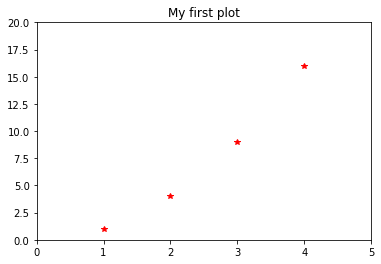

In [24]:
# do some data visualizations
import matplotlib.pyplot as plt

plt.axis([0,5,0,20]) # specify the range values of axes X and Y
plt.title("My first plot")
plt.plot([1,2,3,4],[1,4,9,16],'r*')

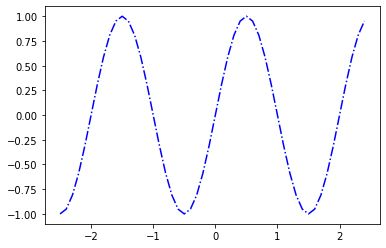

In [25]:
import math
import numpy as np
t = np.arange(-2.5,2.5,0.1)

# the map() function applies the given function to each element of the list/object
y = map(math.sin, math.pi*t)  # map() returns iterator in Python 3

plt.plot(t, list(y), 'b-.') # need to cast y to list


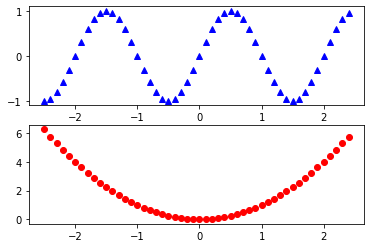

In [26]:
# work with multiple figures using subplot()
def sqr(n):
    return n*n

r = map(sqr,t)
y = map(math.sin,math.pi*t)

# The argument of the subplot() function is composed of three integers.
# The first number defines how many parts the figure is split into vertically. 
# The second number defines how many parts the figure is divided into horizontally. 
# The third issue selects which is the current subplot on which you can direct commands

plt.subplot(211)
plt.plot(t,list(y),'b^')
plt.subplot(212)
plt.plot(t,list(r),'ro')

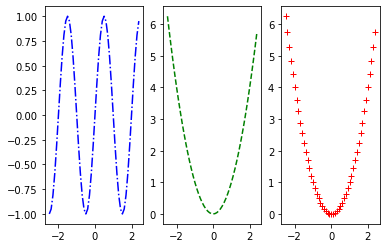

In [27]:
# we can try to do subplotting in vetical subplots

r = map(sqr,t)
s = map(sqr,t)
y = map(math.sin,math.pi*t)

plt.subplot(131)
plt.plot(t,list(y),'b-.')
plt.subplot(132)
plt.plot(t,list(s),'g--')
plt.subplot(133)
plt.plot(t,list(r),'r+')

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


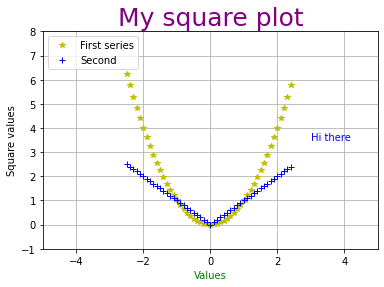

In [31]:
# add some more elements to the plot

r = map(sqr,t)
plt.plot(t,list(r),'y*')
plt.title('My square plot', color='purple', fontsize=25)
plt.axis([-5,5,-1,8])
plt.xlabel('Values', color='green')
plt.ylabel('Square values')
# add some texts to the plot
plt.text(3,3.5,'Hi there', color='blue')
plt.grid(True)
s = map(math.fabs,t)
plt.plot(t,list(s),'b+')
plt.legend(['First series','Second'], loc=2)

# save your chart to the file
plt.savefig('/content/drive/MyDrive/mychart.png')

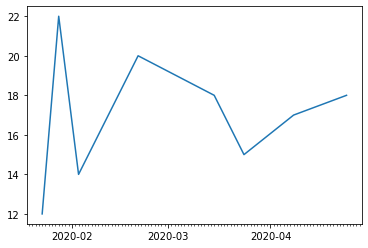

In [32]:
# handle date and time properly

import datetime
import matplotlib.dates as mdates

months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%Y-%m')

events = [datetime.date(2020,1,23),datetime.date(2020,1,28),
          datetime.date(2020,2,3),datetime.date(2020,2,21),
          datetime.date(2020,3,15),datetime.date(2020,3,24),
          datetime.date(2020,4,8),datetime.date(2020,4,24)]
readings = [12,22,14,20,18,15,17,18]

fig, ax = plt.subplots()  # fig = plt.figure(); ax = fig.add_subplot(111)

plt.plot(events,readings)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)

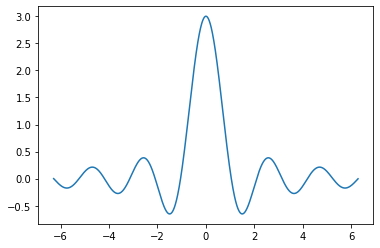

In [33]:
# Knowing how to choose the type of chart to our data is a fundamental choice. 
# Remember that even an excellent data analysis represented incorrectly can lead 
# to a wrong interpretation of the experimental results

# line chart
x = np.arange(-2*np.pi,2*np.pi,0.01)
y = np.sin(3*x)/x
plt.plot(x,y)

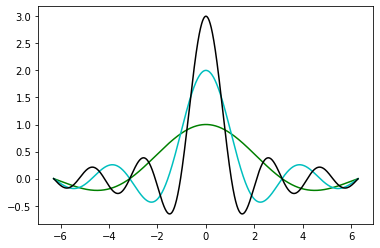

In [34]:
x = np.arange(-2*np.pi,2*np.pi,0.01)
y = np.sin(x)/x
y2 = np.sin(2*x)/x
y3 = np.sin(3*x)/x
plt.plot(x,y, color='g')
plt.plot(x,y2, color='c')
plt.plot(x,y3, color='k')
# color codes are: r, g, b, c, m, y, k (black), w (white)

[33 39 44 45 44 89 55 33 83 63 88 29 52 54 24 36 99 13 55 46 94  9 33 31
 20 20 51 79 39 38 63 47 94 14 69 58 40 80 79 80 32 30 91  9 49 21 22 47
 70 41 36 98 37 70 96 99 39  6 56 44 38 89  9 44 73 28 66 25 66 15  0 14
 62 87 40 11 63 71 21 90 89 83 41 79 46 67 34  9 54 29 61  9  2 76 53 42
 64  0 73 97]
[3. 6. 4. 1. 6. 4. 7. 8. 9. 6. 5. 4. 6. 4. 5. 4. 4. 5. 4. 5.]


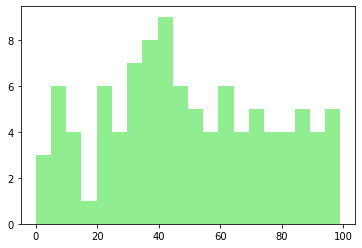

In [35]:
# histogram

# np.random.seed(4)  # if you want to set a seed of the random number generator.

pop = np.random.randint(0,100,100)
print(pop)

n,bins,patches = plt.hist(pop,bins=20,color='lightgreen')
print(n)

<BarContainer object of 5 artists>

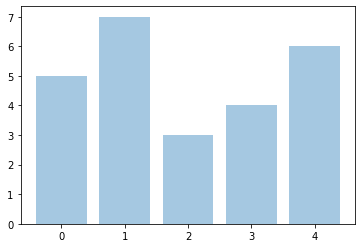

In [36]:
# bar chart
index = [0,1,2,3,4]
values = [5,7,3,4,6]
plt.bar(index,values,alpha=0.4) # alpha is the transparency/opacity value

([<matplotlib.axis.XTick at 0x7f839b62ec10>,
 [Text(0, 0, 'A'),
  Text(0, 0, 'B'),
  Text(0, 0, 'C'),
  Text(0, 0, 'D'),
  Text(0, 0, 'E')])

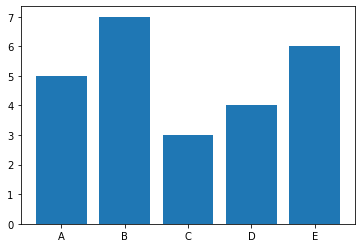

In [37]:
# another bar chart
index = np.arange(5)
values1 = [5,7,3,4,6]
plt.bar(index,values1)
plt.xticks(index,['A','B','C','D','E'])  # labeling the ticks

([<matplotlib.axis.YTick at 0x7f839b5b6f90>,
 [Text(0, 0, 'A'),
  Text(0, 0, 'B'),
  Text(0, 0, 'C'),
  Text(0, 0, 'D'),
  Text(0, 0, 'E')])

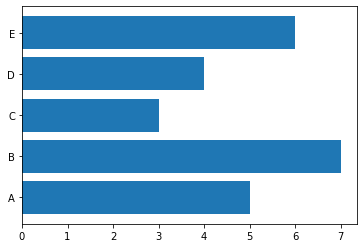

In [38]:
# horizontal bar chart
index = np.arange(5)
values1 = [5,7,3,4,6]
plt.barh(index,values1)
plt.yticks(index,['A','B','C','D','E'])  # labeling the ticks

([<matplotlib.axis.XTick at 0x7f839b525e50>,
 [Text(0, 0, 'A'),
  Text(0, 0, 'B'),
  Text(0, 0, 'C'),
  Text(0, 0, 'D'),
  Text(0, 0, 'E')])

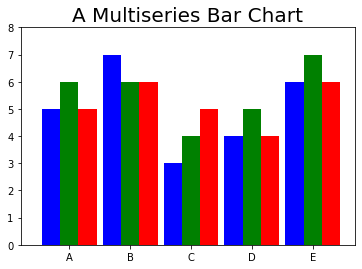

In [39]:
# multiseries bar chart

index = np.arange(5)
index += 1
values1 = [5,7,3,4,6]
values2 = [6,6,4,5,7]
values3 = [5,6,5,4,6]
bw = 0.30  # the width of the bars
plt.axis([0.5,6,0,8])
plt.title('A Multiseries Bar Chart',fontsize=20)
plt.bar(index,values1,bw,color='b')
plt.bar(index+bw,values2,bw,color='g')
plt.bar(index+2*bw,values3,bw,color='r')
plt.xticks(index+bw,['A','B','C','D','E'])

([<matplotlib.axis.XTick at 0x7f839b51d7d0>,
 [Text(0, 0, 'Jan15'),
  Text(0, 0, 'Feb15'),
  Text(0, 0, 'Mar15'),
  Text(0, 0, 'Apr15')])

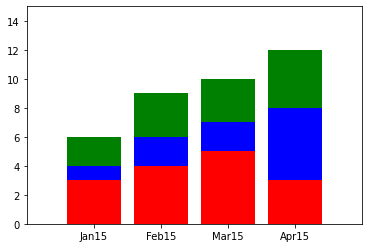

In [40]:
# multiseries stacked bar chart

series1 = np.array([3,4,5,3])
series2 = np.array([1,2,2,5])
series3 = np.array([2,3,3,4])
index = np.arange(4)
index += 1

plt.axis([0,5,0,15])
plt.bar(index,series1,color='r')
plt.bar(index,series2,color='b',bottom=series1)  # add the bottom parameter
plt.bar(index,series3,color='g',bottom=(series2+series1))
plt.xticks(index,['Jan15','Feb15','Mar15','Apr15'])

([<matplotlib.axis.YTick at 0x7f839ba5f8d0>,
 [Text(0, 0, 'Jan15'),
  Text(0, 0, 'Feb15'),
  Text(0, 0, 'Mar15'),
  Text(0, 0, 'Apr15')])

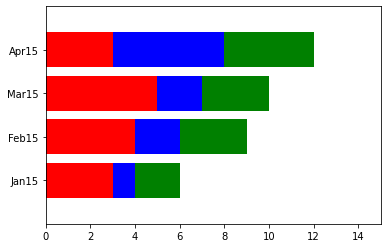

In [41]:
# try the horizontal stacked bar chart
series1 = np.array([3,4,5,3])
series2 = np.array([1,2,2,5])
series3 = np.array([2,3,3,4])
index = np.arange(4)
index += 1

plt.axis([0,15,0,5])
plt.barh(index,series1,color='r')
plt.barh(index,series2,color='b',left=series1)  # add the left parameter
plt.barh(index,series3,color='g',left=(series2+series1))
plt.yticks(index,['Jan15','Feb15','Mar15','Apr15'])


([<matplotlib.axis.YTick at 0x7f839b534b90>,
 [Text(0, 0, 'Jan15'),
  Text(0, 0, 'Feb15'),
  Text(0, 0, 'Mar15'),
  Text(0, 0, 'Apr15')])

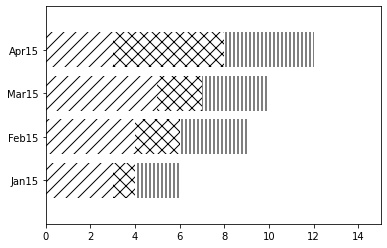

In [42]:
# try to use hatches instead of colors
series1 = np.array([3,4,5,3])
series2 = np.array([1,2,2,5])
series3 = np.array([2,3,3,4])
index = np.arange(4)
index += 1

plt.axis([0,15,0,5])
plt.barh(index,series1,color='w',hatch='//')  # set color to white first
plt.barh(index,series2,color='w',hatch='XX',left=series1)  # add the left parameter
plt.barh(index,series3,color='w',hatch='|||', left=(series2+series1))
plt.yticks(index,['Jan15','Feb15','Mar15','Apr15'])


([<matplotlib.patches.Wedge at 0x7f839b4432d0>,
 [Text(0.6465637441936395, 0.8899187180267095, 'Huawei'),
  Text(-1.0461622061152445, 0.33991857627391475, 'Samsung'),
  Text(-0.49938938453783255, -0.9801072607683942, 'Apple'),
  Text(0.4993897515948555, -0.9801070737434909, 'Oppo'),
  Text(1.0461622458970796, -0.339918453837944, 'Vivo')])

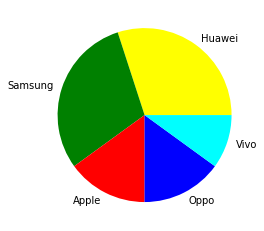

In [43]:
# pie chart
labels = ['Huawei','Samsung','Apple','Oppo','Vivo']
values = [30,30,15,15,10]
colors = ['yellow','green','red','blue','cyan']
plt.pie(values,labels=labels,colors=colors)
# plt.axis('equal')

Text(0.5, 1.0, "Thailand's phone market")

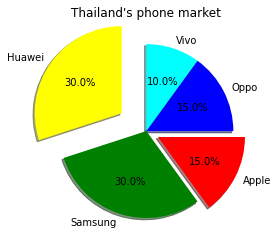

In [44]:
# to explode some slices

labels = ['Huawei','Samsung','Apple','Oppo','Vivo']
values = [30,30,15,15,10]
colors = ['yellow','green','red','blue','cyan']
explode =  [0.35,0,0.15,0,0]   # values from 0 to 1, with higher value means moving out
plt.pie(values,labels=labels,colors=colors,explode=explode,shadow=True,
        autopct='%1.1f%%',startangle=90)  # start at the 90 degrees with the first slice
plt.title("Thailand's phone market")


In [45]:
# Done!
print("Done.")

Done.
